# **MNIST classification with feed forward neural network**
### This is my *'Hello world'* for deep learning.
### In this notebook I'll build a simple neural network model with Tensorflow and Keras and use it to classify the classic MNIST dataset. 
---
## 1. Imports and loading data
### The dataset is loaded from Keras API. The function `load_data()` returns the data partitioned to train and test datasets by default.

In [86]:
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

---
## 2. Data exploration and modification
### From the shapes of data we see that n = 70000 and it's split to train (n = 60000) and test (n = 10000) datasets.
### The feature data are tensors with each single data point being a 28x28 matrix. Label data are 1D arrays.

In [87]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### When looking at a single data point we can see that the feature matrix is a bunch of integers between 0 and 255. This is actually obvious since the features are grayscale images of digits!

### Labels are just simply integers telling which digit the image is representing.

In [29]:
print(x_train[1])
print(y_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### In machine learning, and in scientific computing in general, it's important to remove any biases affecting the outcome of the model. Sometimes different numerical scales in features can lead to one feature dominating the model. This is also true for feature data fed into a neural network.

### The feature data is normalized here with a built-in function `normalize()`. In this case, we would've gotten the same result by dividing the data by 255. This way the feature data is normalized between 0 and 1.

In [91]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# 97,69% 94,80%
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

With default settings in pyplots `imshow()` function the grayscale digit is plotted with 'viridis' colormap. By setting the colormap to 'binary' we can see the digit plotted as black-in-white text.

By printing the correct label we can verify that this is indeed a digit '0'.

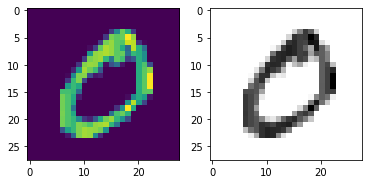

The correct label is: 0


In [92]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(x_train[1])
axs[1].imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

print(f'The correct label is: {y_train[1]}')

Build the model

In [93]:
NEURONS = 256
EPOCHS = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(NEURONS, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
model.compile(
  optimizer='Adam',
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy']
)

Fit the model

In [94]:
log_dir = f'logs/fit/FFNN-{NEURONS}-NEURONS-{EPOCHS}-EPOCHS-{datetime.now().strftime("%Y%m%d-%H%M%S")}'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
  x_train,
  y_train,
  epochs=EPOCHS,
  validation_data=(x_test, y_test),
  callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - sparse_categorical_accuracy: 0.9251 - val_loss: 0.1463 - val_sparse_categorical_accuracy: 0.9557
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1128 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.1070 - val_sparse_categorical_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9780 - val_loss: 0.0894 - val_sparse_categorical_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0875 - val_sparse_categorical_accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0391 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.0784 - val_sparse_categorical_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0295 - spars

[6.0090814e-11 6.7184017e-14 5.2554722e-10 1.8658280e-07 8.3332515e-16
 6.0511936e-13 5.3177241e-18 9.9999976e-01 1.2871811e-11 1.4327583e-08]


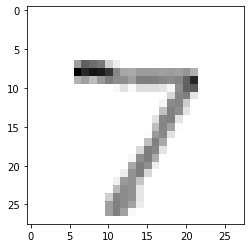

Correct label: 7
Predicted label: 7


In [95]:
predictions = model.predict(x_test)
print(predictions[0])

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
print(f'Correct label: {y_test[0]}')
print(f'Predicted label: {np.argmax(predictions[0])}')

Incorrectly labelled digits: 231


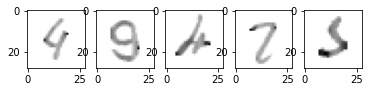

Correct labels: [4 9 4 2 5]
Predicted label: [9 5 2 7 3]


In [96]:
y_pred = np.argmax(predictions, axis=1)
mask = y_pred != y_test
print(f'Incorrectly labelled digits: {np.count_nonzero(mask)}')

incorrect_indeces = np.where(mask)
fig, axs = plt.subplots(1,5)
axs[0].imshow(x_test[incorrect_indeces[0][0]], cmap=plt.cm.binary)
axs[1].imshow(x_test[incorrect_indeces[0][1]], cmap=plt.cm.binary)
axs[2].imshow(x_test[incorrect_indeces[0][2]], cmap=plt.cm.binary)
axs[3].imshow(x_test[incorrect_indeces[0][3]], cmap=plt.cm.binary)
axs[4].imshow(x_test[incorrect_indeces[0][4]], cmap=plt.cm.binary)
plt.show()

print(f'Correct labels: {y_test[incorrect_indeces[0][0:5]]}')
print(f'Predicted label: {y_pred[incorrect_indeces[0][0:5]]}')